In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
customer= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [5]:
spend= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [7]:
repay= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [37]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [38]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [39]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

#### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
#####  1. In the above dataset,
###### a. In case age is less than 18, replace it with mean of age values.


In [13]:
age = customer.loc[customer['Age'] < 18,'Age'] = customer.Age.mean()
age

48.399399999999986

###### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
###### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [42]:
cus_spd= pd.merge(left= customer, right= spend,
                  on= 'Customer', how= 'inner',
                  indicator= True)
cus_spd.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both


In [46]:
cus_spd[cus_spd['Amount']>cus_spd['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72,both
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49,both
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53,both
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73,both
22,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62,both
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,both
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,both
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,both


In [49]:
cus_spd.loc[cus_spd['Amount']> cus_spd['Limit'], 'Amount'] = 0.5*cus_spd['Limit']

In [51]:
cus_spd[cus_spd['Amount'] > cus_spd['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge


In [55]:
cus_spd.tail()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,both
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,both
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,both
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,both
1499,100,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,102,25-Jan-04,BUS TICKET,50000.00,both


###### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [56]:
cus_rep = pd.merge(left= customer, right= repay,
                  on= 'Customer', how= 'inner')
cus_rep.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN


In [58]:
cus_rep[cus_rep['Amount'] > cus_rep['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104.0,3-Jan-04,185955.07,NaN
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118.0,28-Feb-05,412783.34,NaN
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132.0,6-Apr-04,148038.67,NaN
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146.0,23-Nov-04,179144.68,NaN
23,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174.0,3-Aug-05,381635.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,89.0,30-Mar-06,462283.02,NaN
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30,NaN
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90,NaN
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57,NaN


In [59]:
cus_rep.loc[cus_rep['Amount'] > cus_rep['Limit'], 'Amount'] = cus_rep['Limit']

In [81]:
cus_rep.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN


#### 2. From the above dataset create the following summaries:
#####  a. How many distinct customers exist?

In [62]:
customer['Customer'].nunique()

100

###### b. How many distinct categories exist?


In [65]:
cus_spd['Product'].nunique()

3

In [66]:
cus_spd['Segment'].nunique()

5

In [67]:
cus_spd['Type'].nunique()

15

###### c. What is the average monthly spend by customers?

In [71]:
cus_spd.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [97]:
cus_spd['Month'] = pd.to_datetime(cus_spd['Month'])

In [98]:
cus_spd.dtypes

No                   int64
Customer            object
Age                  int64
City                object
Product             object
Limit              float64
Company             object
Segment             object
Sl No:               int64
Month       datetime64[ns]
Type                object
Amount             float64
_merge            category
dtype: object

In [99]:
cus_spd['monthspd'] = cus_spd['Month'].dt.month
cus_spd['yearspd'] = cus_spd['Month'].dt.year
cus_spd.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge,monthspd,yearspd
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,both,1,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,both,1,2004


In [100]:
avg_mnt_spd = cus_spd.groupby(by=['yearspd', 'monthspd'])['Amount'].mean()
avg_mnt_spd

yearspd  monthspd
2004     1           144233.915179
         2           136998.280000
         3           133708.090714
         4           124621.976429
         5           153326.954286
         9           171579.263571
         11           79642.078571
2005     1           192271.670714
         2           154334.423869
         4           146430.918929
         5           154625.803000
         6           190726.475714
         7           120803.091429
         8           141707.435357
         9           109423.776429
         10           89879.421429
         11          178120.211667
         12           84416.000000
2006     1           136312.515714
         2           148478.986905
         3           131720.289032
         4           134743.702447
         5           143693.687143
         6           155971.498571
         7           189088.681071
         8           213863.917857
         9           142392.073571
         10          172156.287143
  

###### d. What is the average monthly repayment by customers?

In [86]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [88]:
repay.dtypes

SL No:               float64
Customer              object
Month         datetime64[ns]
Amount               float64
Unnamed: 4           float64
dtype: object

In [94]:
repay['monthrep'] = repay['Month'].dt.month
repay['yearrep'] = repay['Month'].dt.year
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4,monthrep,yearrep
0,NaN,A1,2004-01-12,495414.75,NaN,1.0,2004.0
1,2.0,A1,2004-01-03,245899.02,NaN,1.0,2004.0


In [96]:
avg_mnt_rep = repay.groupby(by= ['yearrep','monthrep'])['Amount'].mean()
avg_mnt_rep

yearrep  monthrep
2004.0   1.0         243489.649786
         2.0         256702.630741
         3.0         252585.280667
         4.0         259141.679000
         5.0         226162.720800
         9.0         184487.848750
         11.0        209592.238000
2005.0   1.0         240548.098148
         2.0         238829.265123
         4.0         212688.631333
         5.0         263207.367857
         6.0         210199.818333
         7.0         239871.479167
         8.0         264430.921622
         9.0         247700.170000
         10.0        219849.956667
         11.0        256695.120000
         12.0        320379.335833
2006.0   1.0         293475.389167
         2.0         284489.565128
         3.0         240851.266814
         4.0         275472.251889
         5.0         256920.884943
         6.0         251990.453333
         7.0         257936.383243
         8.0         224143.992500
         9.0         262533.880833
         10.0        260765.480000
  

###### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
###### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
###### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [103]:
cus_spd_rep = pd.merge(left = cus_spd, right = repay,
                      on = 'Customer')
cus_spd_rep.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,...,Amount_x,_merge,monthspd,yearspd,SL No:,Month_y,Amount_y,Unnamed: 4,monthrep,yearrep
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.8,both,1,2004,NaN,2004-01-12,495414.75,NaN,1.0,2004.0
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.8,both,1,2004,2.0,2004-01-03,245899.02,NaN,1.0,2004.0


In [114]:
interest_grp = cus_spd_rep.groupby(['yearspd','monthspd'])[['Amount_x','Amount_y']].sum()
interest_grp.head(2)

Amount_x      Amount_y
yearspd monthspd                            
2004    1         1.143343e+09  1.873917e+09
        2         9.842368e+07  1.736560e+08

In [118]:
interest_grp['profit'] = interest_grp['Amount_y'] - interest_grp['Amount_x']
interest_grp.head(2)

Amount_x      Amount_y        profit
yearspd monthspd                                          
2004    1         1.143343e+09  1.873917e+09  7.305739e+08
        2         9.842368e+07  1.736560e+08  7.523227e+07

In [120]:
interest_grp['int_inc'] = interest_grp['profit'] * 0.029
interest_grp.head(2)

Amount_x      Amount_y        profit       int_inc
yearspd monthspd                                                        
2004    1         1.143343e+09  1.873917e+09  7.305739e+08  2.118664e+07
        2         9.842368e+07  1.736560e+08  7.523227e+07  2.181736e+06

###### f. What are the top 5 product types?

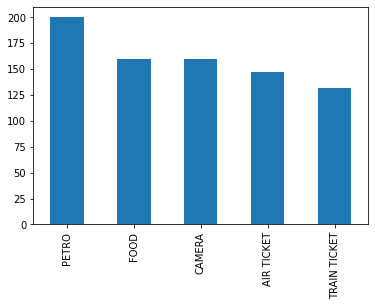

In [132]:
spend['Type'].value_counts().head(5).plot(kind= 'bar')
plt.show()

###### g. Which city is having maximum spend?

In [136]:
city_spend = cus_spd.groupby('City')['Amount'].sum().sort_values(ascending = False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

######  h. Which age group is spending more money?

In [145]:
cus_spd['Age_grp'] = pd.cut(cus_spd.Age,bins=np.arange(18,103,12),labels= ['18-30','30-42','42-54','54-66','66-78','78-90','90-102'], include_lowest = True)
cus_spd.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge,monthspd,yearspd,Age_grp
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,both,1,2004,66-78
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,both,1,2004,66-78


In [149]:
Age_grp_spd = cus_spd.groupby(by= 'Age_grp')['Amount'].sum()
Age_grp_spd.nlargest(1)

Age_grp
42-54    58509211.65
Name: Amount, dtype: float64

######  i. Who are the top 10 customers in terms of repayment?

In [157]:
cus_rep.groupby(by= 'Customer' )[['Amount']].sum().sort_values('Amount', ascending= False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [164]:
citywise_yearspd = cus_spd.pivot_table(values= 'Amount', index= ['yearspd', 'City'], columns= ['Product'], aggfunc = sum)
citywise_yearspd

Product                    Gold    Platimum      Silver
yearspd City                                           
2004    BANGALORE    9289878.54  1112732.30  1291852.58
        BOMBAY       6987853.53   897264.94   532089.03
        CALCUTTA     7477140.98  2037690.30   500006.00
        CHENNAI      1059618.50  3535652.38   282056.86
        COCHIN       7315850.15  3419904.07   814229.62
        DELHI        2806495.00   283512.89   768172.30
        PATNA        2072567.90  1113069.60   756684.10
        TRIVANDRUM   2415102.84  2161676.67   209667.48
2005    BANGALORE   12892362.99   912284.97   830612.34
        BOMBAY       8983018.28   711804.94   508988.54
        CALCUTTA    10303355.80  4434696.31   440147.06
        CHENNAI      3740945.58  5053956.32   377184.49
        COCHIN      12110613.03  4960921.71   652269.38
        DELHI        1964845.27   494157.86   612311.21
        PATNA        3252615.77  2883231.07   950094.19
        TRIVANDRUM   1240375.85  3601443.30   269912.99
2006    BANGALORE   12030611.09   685831.27  1415480.94
        BOMBAY       7917144.31   972130.01  1092833.80
        CALCUTTA    11167532.77  3589606.66  1157956.42
        CHENNAI      2704288.62  5024923.40   350009.50
        COCHIN      10499142.38  4920592.29  1269990.87
        DELHI        2957103.32   176788.72   854899.97
        PATNA        2276181.69  1256137.65   700005.00
        TRIVANDRUM   2735710.87  2147403.75   555862.12

<AxesSubplot:xlabel='yearspd,City'>

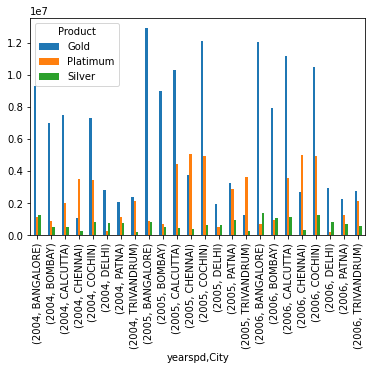

In [165]:
citywise_yearspd.plot(kind= 'bar')

##### 4. Create graphs for
###### a. Monthly comparison of total spends, city wise

<AxesSubplot:xlabel='monthspd,City'>

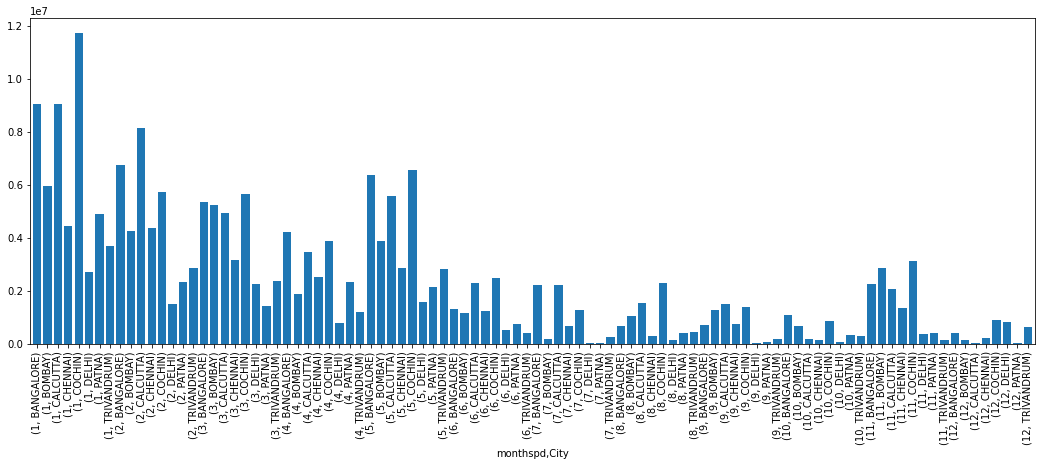

In [180]:
cus_spd.groupby(by= ['monthspd','City'])['Amount'].sum().plot(kind= 'bar',figsize=(18,6) , width=0.8)

In [184]:
cus_spd.pivot_table(values = 'Amount', index= 'City', columns = 'monthspd', aggfunc= 'sum')

monthspd,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


###### b. Comparison of yearly spend on air tickets

<AxesSubplot:xlabel='yearspd'>

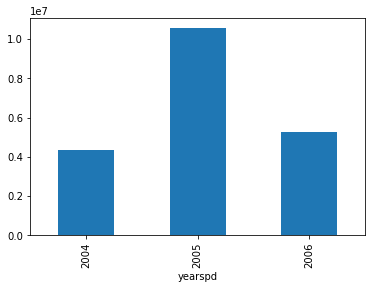

In [193]:
airticket = cus_spd[cus_spd['Type']== 'AIR TICKET'].groupby('yearspd')['Amount'].sum()
airticket.plot(kind= 'bar')

###### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<AxesSubplot:xlabel='monthspd'>

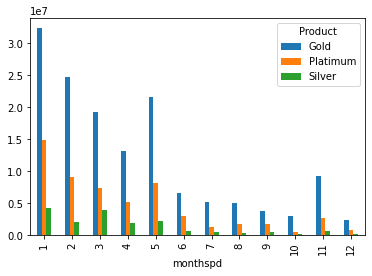

In [197]:
prod_mnt= cus_spd.pivot_table(values= 'Amount', index= 'monthspd', columns= 'Product', aggfunc= sum)
prod_mnt.plot(kind= 'bar')

Customers spend more during the first 5 months of the year

#### 5. Write user defined PYTHON function to perform the following analysis:

###### You need to find top 10 customers for each city in terms of their repayment amount by
###### different products and by different time periods i.e. year or month. The user should be able
###### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
###### function should automatically take these inputs while identifying the top 10 customers.

In [295]:
def summary(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='monthspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='yearspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='monthspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='yearspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='monthspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearspd':
        pivot = cus_rep.pivot_table(index=['Product','City','Customer'],columns='yearspd',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [297]:
summary(silver, monthspd)

NameError: name 'silver' is not defined